In [55]:
# https://www.miyoushe.com/sr/article/40136882
def 生效概率(
    基础概率: float,
    我方命中: float,
    敌方抵抗: float,
    敌方对应负面效果抵抗: float = 0,
    /,
) -> float:
    return max(
        0,
        min(1, 基础概率 * (1 + 我方命中) * (1 - 敌方抵抗) * (1 - 敌方对应负面效果抵抗)),
    )

In [56]:
基础概率 = 1

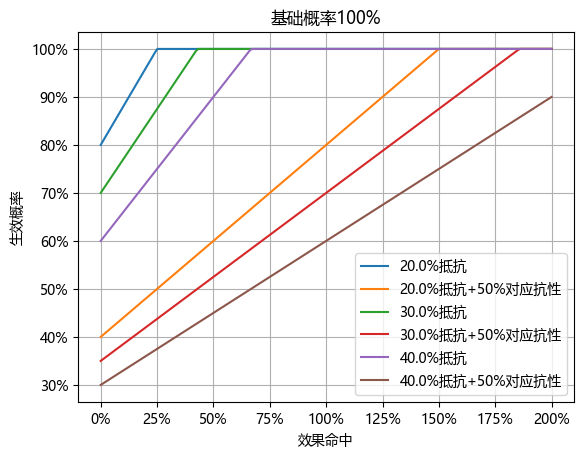

In [57]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import numpy as np

mpl.rcParams["font.sans-serif"] = "Microsoft YaHei"

x = np.linspace(0, 2, 200)
fig, ax = plt.subplots()
for 敌方效果抵抗 in (0.2, 0.3, 0.4):
    ax.plot(
        x,
        np.vectorize(lambda x: 生效概率(基础概率, x, 敌方效果抵抗))(x),
        label=f"{敌方效果抵抗*100}%抵抗",
    )
    ax.plot(
        x,
        np.vectorize(lambda x: 生效概率(基础概率, x, 敌方效果抵抗, 0.5))(x),
        label=f"{敌方效果抵抗*100}%抵抗+50%对应抗性",
    )
ax.set_xlabel("效果命中")
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set_ylabel("生效概率")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.legend()
ax.set_title(f"基础概率{基础概率*100}%")
plt.grid()
plt.show()